<a href="https://colab.research.google.com/github/venn2713/SKM_Vasilev_SA/blob/main/Vasilev_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Плохая обусловленность метода Кардано

Метод Кардано, также известный как метод кубических уравнений, является одним из методов решения кубических уравнений вида $$ax^3 + bx^2 + cx + d = 0,$$ где $a$, $b$, $c$ и $d$ - коэффициенты уравнения.

Основная идея метода заключается в том, чтобы привести уравнение к виду 
$$y^3 + py = q, 
\qquad 
y = x - \frac{b}{3a}.
$$ Для этого используются замены переменных и другие преобразования.

Вот реализация метода Кардано для нахождения корней кубического уравнения $y^3 + ay^2 + by + c = 0$ с вещественными или комплексными коэффициентами:

In [ ]:
def f(y, λ):
    return y**3 + 3*y**2 + λ**2*y + 3*λ**2

Эта функция f принимает два аргумента: y и λ. Она используется для вычисления значения функции, заданной уравнением $y^3 + 3y^2 + \lambda^2 y + 3\lambda^2 = 0.$

In [50]:
import numpy as np

def cardano(a, b, c):
    Q = (3*b - a**2)/9
    R = (9*a*b - 27*c - 2*a**3)/54
    Delta = Q**3 + R**2
    S = np.cbrt(R + np.sqrt(Delta))
    T = np.cbrt(R - np.sqrt(Delta))
    if Delta > 0:
        y1 = S + T - a/3
        y2 = -(S + T)/2 - a/3 + 1j*(S - T)*np.sqrt(3)/2
        y3 = -(S + T)/2 - a/3 - 1j*(S - T)*np.sqrt(3)/2
    else:
        theta = np.arccos(R/np.sqrt(-Q**3))
        y1 = 2*np.sqrt(-Q)*np.cos(theta/3) - a/3
        y2 = 2*np.sqrt(-Q)*np.cos((theta + 2*np.pi)/3) - a/3
        y3 = 2*np.sqrt(-Q)*np.cos((theta + 4*np.pi)/3) - a/3

    return y1, y2, y3

Функция `cardano(a, b, c)` возвращает три корня `y1`, `y2` и `y3` в виде вещественных чисел или комплексных чисел в зависимости от того, являются ли коэффициенты $a$, $b$ и $c$ вещественными или комплексными.

В методе Кардано используется переменная `Q`, `R` и `Delta`, чтобы вычислить корни кубического уравнения. Если `Delta > 0`, то используются формулы для вычисления корней для случая вещественных коэффициентов. Если `Delta < 0`, то используются формулы для вычисления корней для случая комплексных коэффициентов.

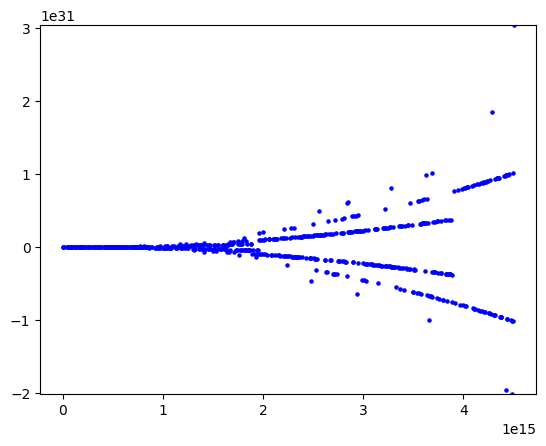

Минимальное значение y = -2.0120313073689548e+31
Максимальное значение y = 3.0423614405477506e+31


In [51]:
import matplotlib.pyplot as plt

y_max = float('-inf')
y_min = float('inf')

# Количество точек на графике
points_count = 1000;

# Диапазон значений x
x_range = np.linspace(0, 1. / np.finfo(float).eps, points_count)

for x in x_range: 
    # Вычисляем корни уравнения
    y0, y1, y2 = cardano(3, x**2, 3 * x**2)
    
    # Если корень вещественный, вычисляем значение y и добавляем его в график
    if y0.imag == 0:
        y_val = f(y0.real, x)
        if y_val != 0:
            y_max = max(y_max, y_val)
            y_min = min(y_min, y_val)
            plt.scatter(x, y_val, c='blue', s=5)
            
    if y1.imag == 0:
        y_val = f(y1.real, x)
        if y_val != 0:
            y_max = max(y_max, y_val)
            y_min = min(y_min, y_val)
            plt.scatter(x, y_val, c='blue', s=5)
            
    if y2.imag == 0:
        y_val = f(y2.real, x)
        if y_val != 0:
            y_max = max(y_max, y_val)
            y_min = min(y_min, y_val)
            plt.scatter(x, y_val, c='blue', s=5)

# Установка границ по y и отображение графика
plt.ylim(bottom=y_min, top=y_max)
plt.show()

# Вывод минимального и максимального значения y
print('Минимальное значение y = {0}'.format(y_min))
print('Максимальное значение y = {0}'.format(y_max))


Этот блок кода визуализирует функцию `f(y, λ)` в диапазоне значений $x$ от $0$ до очень большого числа (ограниченного только точностью хранения чисел с плавающей точкой), используя метод Кардано для нахождения корней уравнения $$y^3 + 3*y^2 + λ^2*y + 3*λ^2 = 0,$$ где коэффициенты $a$, $b$ и $c$ соответствуют $1$, $x^2$ и $3*x^2$ соответственно.

Каждый найденный вещественный корень подставляется в функцию `f(y, λ)`, и если полученное значение не равно 0, оно добавляется на график в виде синей точки. Также вычисляются минимальное и максимальное значения y на графике, которые выводятся после того, как график отображен.

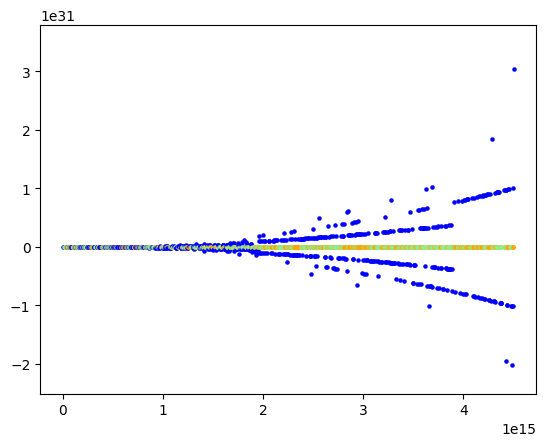

In [49]:
import scipy.optimize as opt

# Количество точек на графике
points_count = 1000;

# Диапазон значений x
x_range = np.linspace(0, 1. / np.finfo(float).eps, points_count)

y_max = float('-inf')
y_min = float('inf')

for x in x_range: 
    # Локализация корней методом Кардано
    y0, y1, y2 = cardano(3, x**2, 3*x**2)
    
    # Вычисление значений функции в точках корней
    cardano_y = f(y0, x) if y0.imag == 0 else None
    newton_y = f(opt.newton(lambda _x: f(_x, x), 0), x)
    brentq_y = f(opt.brentq(lambda _x: f(_x, x), -1000, 1000), x)
    
    # Отображение точек на графике
    if newton_y != 0 and not np.isnan(newton_y):
        y_max = max(y_max, newton_y)
        y_min = min(y_min, newton_y)
        plt.scatter(x, newton_y, c='orange', s=5)
        
    if cardano_y is not None and cardano_y != 0 and not np.isnan(cardano_y):
        y_max = max(y_max, cardano_y)
        y_min = min(y_min, cardano_y)
        plt.scatter(x, cardano_y, c='blue', s=5)
        
    if brentq_y != 0 and not np.isnan(brentq_y):
        y_max = max(y_max, brentq_y)
        y_min = min(y_min, brentq_y)
        plt.scatter(x, brentq_y, c='lightgreen', s=5)
        
# Установка границ по y и отображение графика
plt.ylim(bottom=y_min * 1.25, top=y_max * 1.25)
plt.show()


Этот блок кода использует модуль `scipy.optimize` для нахождения корней функции вместо метода Кардано. Для каждого значения `x` в диапазоне `x_range` выполняется следующее:

* Используя функцию `opt.newton`, вычисляется корень функции при заданном `x` с начальным значением $0$. Это делается с помощью локализации корня методом Ньютона
(полученное значение функции сохраняется в переменную `newton_y`).

* Используя функцию `opt.brentq`, вычисляется корень функции при заданном `x` в заданном диапазоне (полученное значение функции сохраняется в переменную `brentq_y`).

* Используя метод Кардано, вычисляются корни функции при заданном `x` (значения функции в точках корней сохраняются в переменной `cardano_y`).

* Выполняется отображение точек на графике в зависимости от полученных значений функции (точки, полученные с помощью метода Ньютона, отображаются оранжевым цветом, точки, полученные с помощью метода Брента, отображаются светло-зеленым цветом, а точки, полученные с помощью метода Кардано, отображаются синим цветом).

Наконец, устанавливаются границы по оси $y$, и график отображается с помощью функции `plt.show()`.

# Вывод
Метод Кардано имеет плохую обусловленность, что означает, что небольшие изменения входных параметров могут приводить к большим изменениям выходных результатов. Это может приводить к потере точности и значительным ошибкам при решении уравнений. В блоке кода, где используется метод Кардано для нахождения корней уравнения, это может привести к тому, что полученные значения корней могут быть неточными или даже неверными, особенно если корни находятся близко к нулю. В то время как методы оптимизации, такие как метод Ньютона и метод Брента, обычно имеют лучшую обусловленность, что делает их более надежными при решении уравнений.